DeepTraffic is a deep reinforcement learning competition hosted as part of the MIT Deep Learning courses.
The goal is to create a neural network that drives a vehicle (or multiple vehicles) as fast as 
possible through dense highway traffic.







DeepTraffic is a simulation and deep reinforcement learning environment in which one or more
vehicles (red cars) must navigate through dense traffic (white cars) as quickly as possible. The red
cars are “intelligent” in that they are controlled by Javascript code that is provided through the online
interface, and can thus plan movement in response to current road conditions as perceived through
4 sensors. The white cars move randomly according to a stochastic model. There is
always one red ego vehicle, an agent the game screen follows.


 Simulation
 
 Game Environment
 
DeepTraffic takes place on a 7 lane highway. The highway, H, is a continuous 2d space, 140 pixels
wide by 700 pixels long. The perspective of the game follows the ego vehicle such that the nose of
the ego vehicle remains at the 175th pixel. This means, the dynamics of DeepTraffic are relative to
the ego vehicle.
When other vehicles drive off the highway, either by moving slower or faster than the ego vehicle,
they will reappear at the end of the highway opposite to where they recently disappeared. When
vehicle’s reappear, their speed and lane are chosen randomly.


State Input for
Policy Network. Image given below.


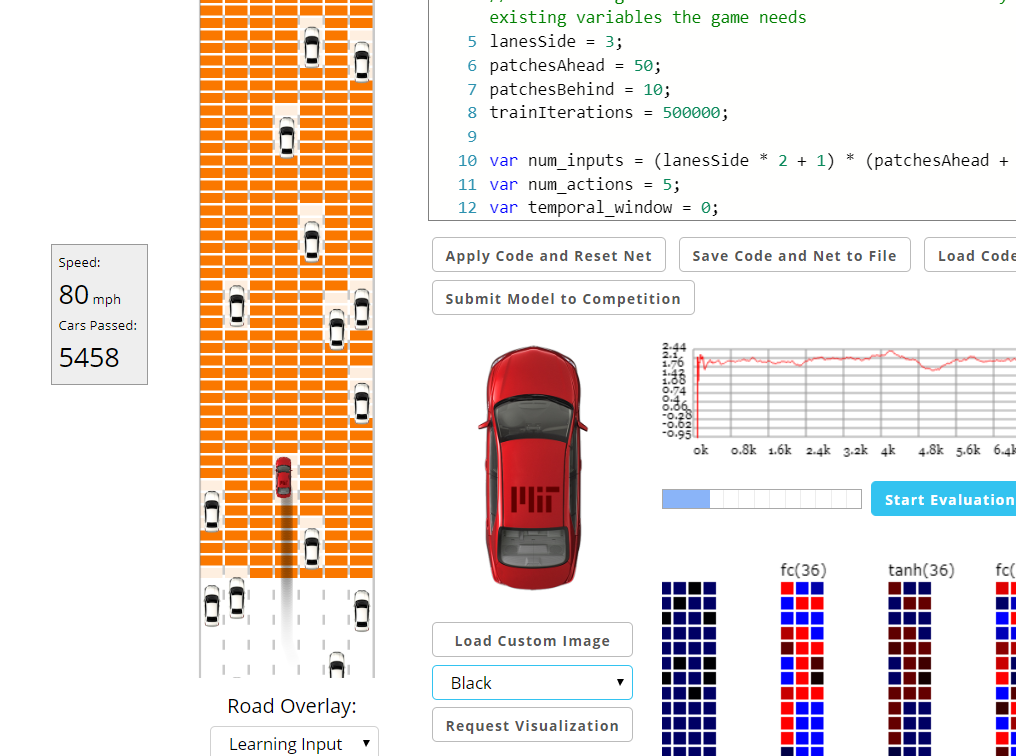








 Vehicle dynamics
    
The dynamics of the cars in DeepTraffic are all relative to the ego car, c0. According to these dynamics, a car may move vertically according the equation:
dy/dt = −(speedi− speed0)
where speedj = speedj,max ∗ speedj,factor
A car may also move horizontally to its desired target lane according to the equation:
dx/dt = (xtarget – xi)/T
where T is a time constant .

Safety





Since the focus of DeepTraffic is to learn efficient movement patterns in traffic, the problem of collision avoidance
is abstracted away by using a “safety system”. The safety system looks at the occupancy grid and prevents the vehicle
from colliding by either preventing an action which would lead to a crash or altering the speed of the vehicle.
If a vehicle is precisely 4 cells below another vehicle, it assumes the above vehicle’s speed. If the vehicle is closer
than 4 cells to an above vehicle, as can happen after lane changes, it slows down inversely proportional to the distance.
One of the defining qualities of DeepTraffic is that it is entirely implemented in Javascript, including the simulation,
the visualization, the reinforcement learning framework, the neural network training and inference. This significantly 
simplifies the typical overhead of installing software required to train a Deep RL agent and run a simulated environment. 
The accessibility of this environment as a way to explore Deep RL approaches naturally motivated turning the playground 
into a competition. This code is usually one that utilizes a DQN. ConvNetJS  is used here, because it uses plain Javascript.
Despite its unconventionality, ConvNetJS bears resemblance to other deep learning frameworks. Data, weights, and gradients 
are stored in multi-dimensional arrays. Optimizers such as SGD can be used to train neural networks. The competition’s
default reinforcement learning algorithm was Deep Q-learning with Experience Replay. Read my blog on Q learning here. 


Collision Avoidance Safety system. Image Below










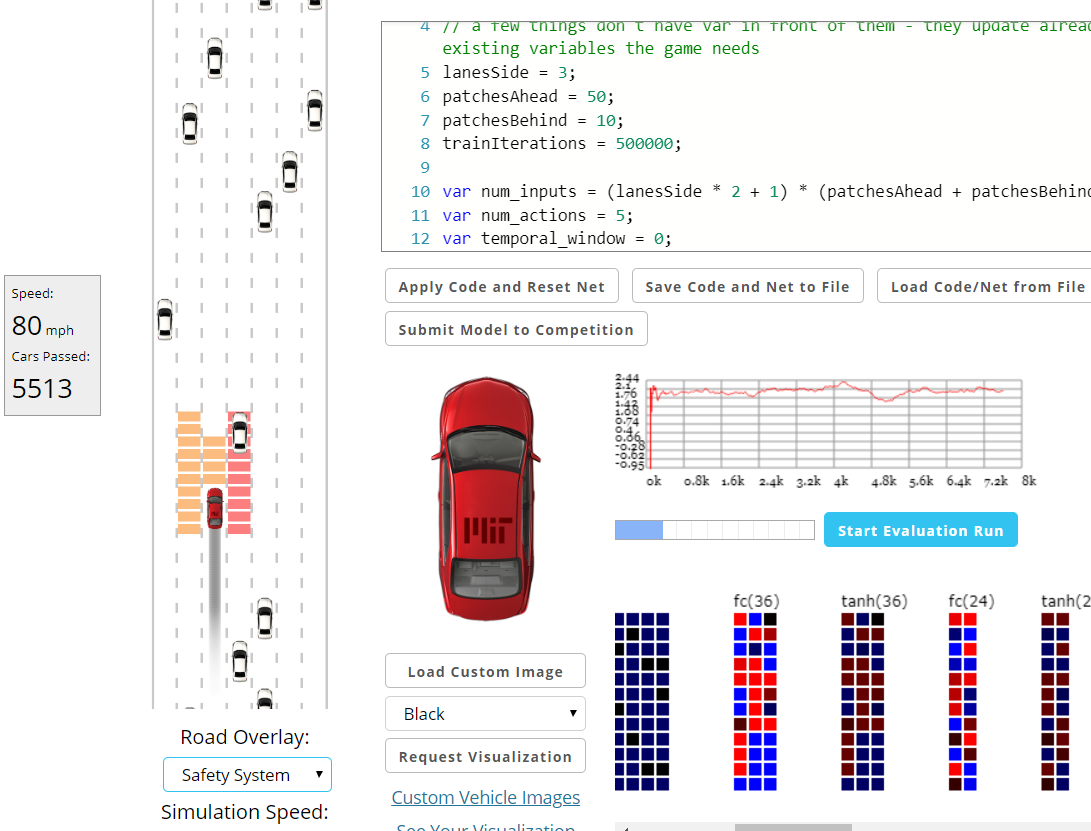




Markov State
First, I used big field of view. LanesSide = 3, pacthesAhead = 50, patchesBehind = 10. And here comes first important
thing as for my opinion. I  have set temporal window to 0. Why? Sooo. We use deep q networks algorithm. It is a reinforcement
learning algorithm. It receives state vector and provides an action that we need to apply. Regarding state vector we
need to keep it minimalistic and as much markov as possible.


Code:


In [ ]:

lanesSide = 3;
patchesAhead = 50;
patchesBehind = 10;
trainIterations = 500000;

var num_inputs = (lanesSide * 2 + 1) * (patchesAhead + patchesBehind);
var num_actions = 5;
var temporal_window = 0;
var network_size = num_inputs * temporal_window + num_actions * temporal_window + num_inputs;


 What is a markov state? 

Basically it is state that contains all information we need to predict later behaviour of our environment. If we use just one patch above the car we will not be able to predict anything. Then we use wider field of view. Patches of the field of view contains information about velocity of the object above the batch. So we receive information not only about positions but about velocities of other cars as well just in one time step. What about other time steps? I think it might be useful to determine other cars drive style or other sophisticated things about other cars behaviour. But, I believe that other cars have same and random behaviour, so it's useless to try to predict random. In another hand, positions and velocities are a lot of useful information. Also using other time steps will not slow computation for us.

Neural Network architecture

As for neural network architecture. I have a number of different architectures and stayed at 4 layers with 36, 24, 24, 24 neurones. Second important thing I want to mention that we need tanh activation on last hidden layer. ReLU is quite good and let us to have deeper networks, but here me pure ReLU on all layers tend to diverge in reinforcement learning. Here I used tanh on all layers but relu is also possible if you have tanh on the last hidden layer. 



In [ ]:
var layer_defs = [];
layer_defs.push({
    type: 'input',
    out_sx: 1,
    out_sy: 1,
    out_depth: network_size
});
layer_defs.push({
    type: 'fc',
    num_neurons: 36,
    activation: 'tanh'
});
layer_defs.push({
    type: 'fc',
    num_neurons: 24,
    activation: 'tanh'
});
layer_defs.push({
    type: 'fc',
    num_neurons: 24,
    activation: 'tanh'
});
layer_defs.push({
    type: 'fc',
    num_neurons: 24,
    activation: 'tanh'
});
layer_defs.push({
    type: 'regression',
    num_neurons: num_actions
});


Gamma


I used 128 one hundred twenty eight batch size and default learning rate. As for experience replay size. 
We need a much bigger one than the default. for example 1000,000. In deep learning it's better to  start learning threshold, 
5000 (five thousand), to be able to accumulate different behaviour before learning. Gamma is a very important parameter 
for DQN. It defines how sensitive our car is for future situations. Gamma is between 0 and 1. And if it is 0 it will not
consider its future. If it is 1 it will consider situations that may happen in the deepest future. You likely want to use 1. 
But with 1 the algorithm tend to diverge. So typical value is 0.9 (nine). I've used 0.98. Start learning threshold from 5000
(five thousand), to be able to accumulate different behaviour before learning. 


The Hyperparametres are as follows:
    
Img source: MIT deep Learning course

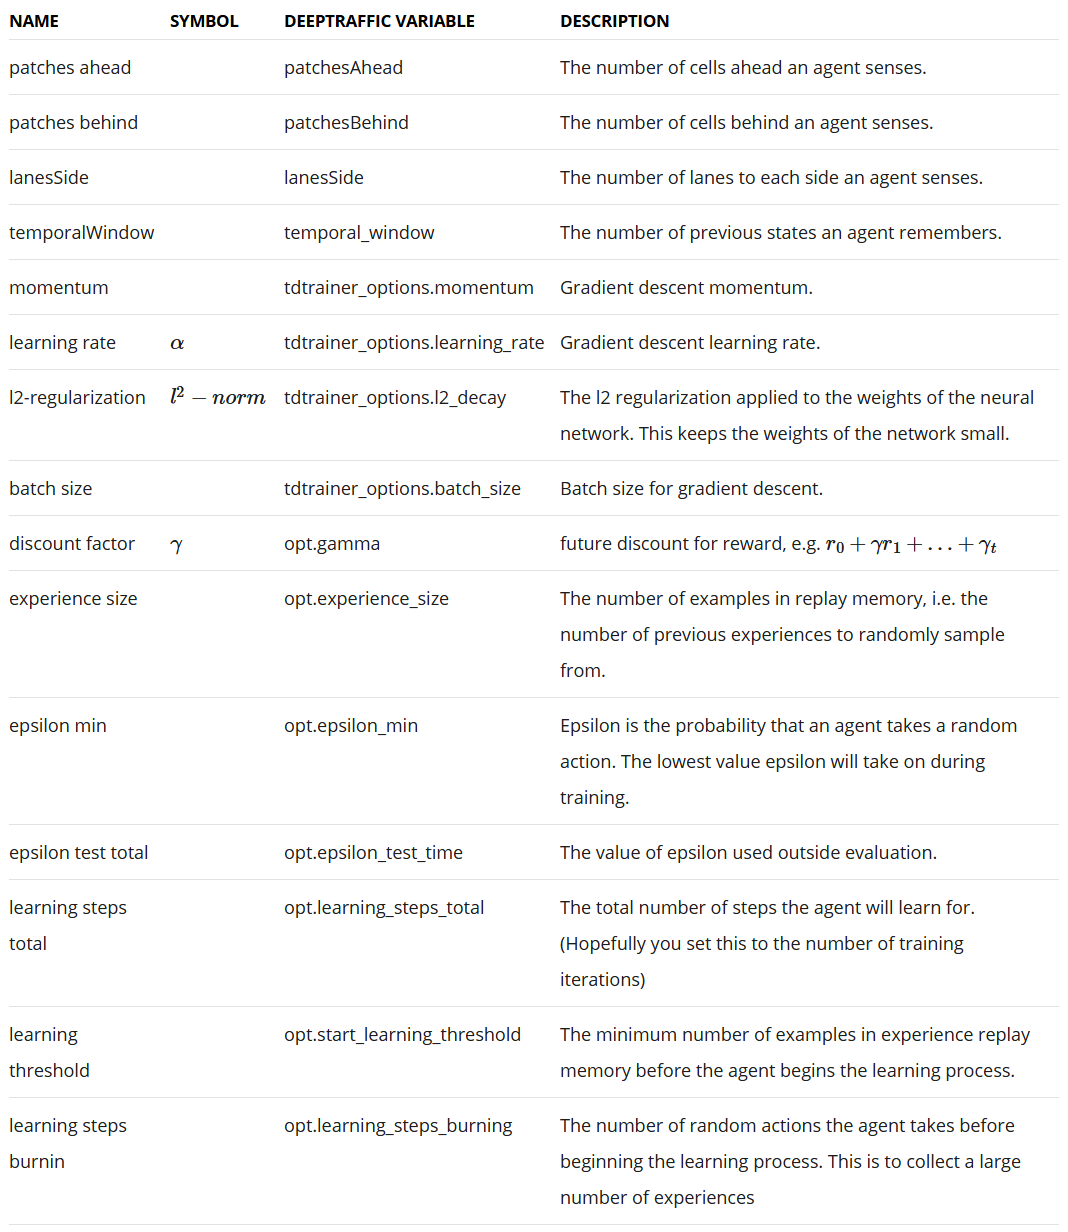
    


In [ ]:
var opt = {};
opt.temporal_window = temporal_window;
opt.experience_size = 100000;
opt.start_learn_threshold = 50000;
opt.gamma = 0.98;
opt.learning_steps_total = 500000;
opt.learning_steps_burnin = 1000;
opt.epsilon_min = 0.0;
opt.epsilon_test_time = 0.0;
opt.layer_defs = layer_defs;
opt.tdtrainer_options = tdtrainer_options;
brain = new deepqlearn.Brain(num_inputs, num_actions, opt);
learn = function (state, lastReward) {
    brain.backward(lastReward);
    var action = brain.forward(state);
draw_net();
    draw_stats();

    return action;


My Results: Conclusion


The speed received after training and evaluation is: 71.87 mph


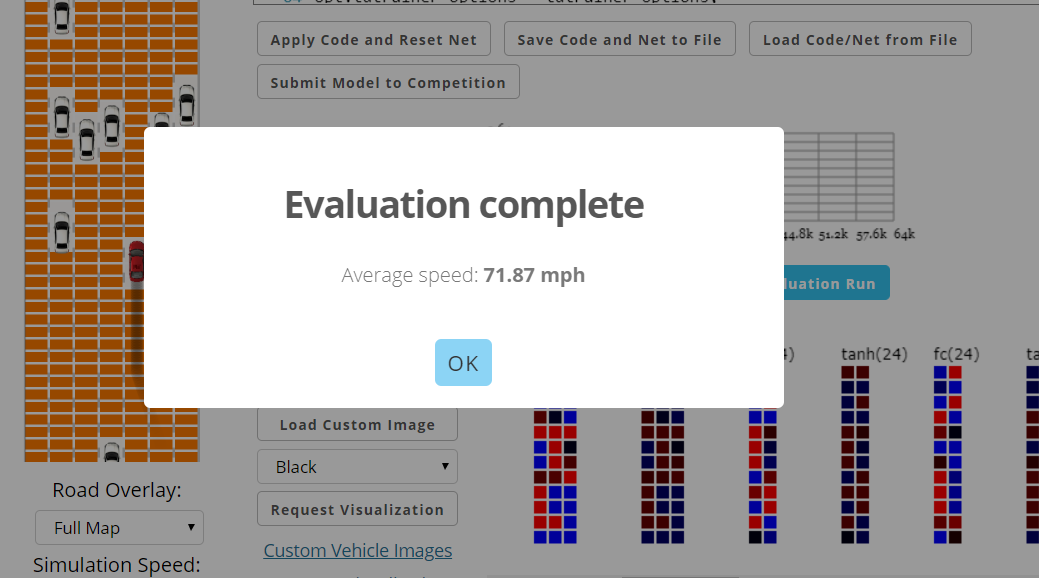



Training graph looks like:

see below




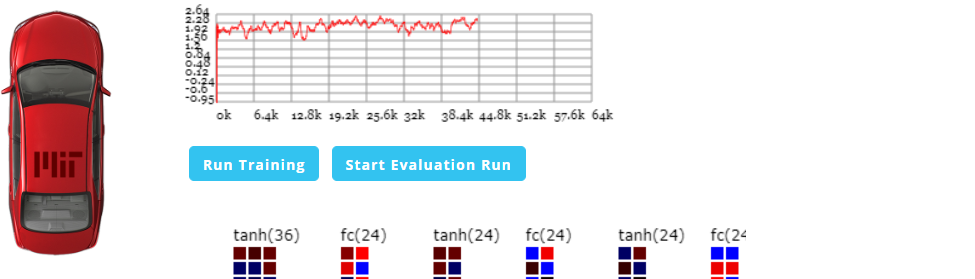




